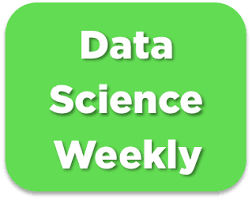

# Challenge : predict conversions 🏆🏆

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

**For a detailed description of this project, please refer to *02-Conversion_rate_challenge.ipynb*.**

### Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from IPython.display import display
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


### Settings

In [2]:
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE

### Dataset import

In [3]:
data = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


# Overview

In [4]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [5]:
df = pd.DataFrame(data)

In [6]:
print(df.columns.tolist())

['country', 'age', 'new_user', 'source', 'total_pages_visited', 'converted']


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


In [8]:
data.describe(include="all")

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [9]:
data["country"].value_counts()

country
US         160124
China       69122
UK          43641
Germany     11693
Name: count, dtype: int64

In [10]:
data["source"].value_counts()

source
Seo       139477
Ads        80027
Direct     65076
Name: count, dtype: int64

In [11]:
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
data_sample = data.sample(10000)

# Preprocessing

In [12]:
# Define Features and Target
features_list = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
target_variable = 'converted'

In [13]:
# Define X and Y
X = df.loc[:, features_list]
Y = df.loc[:, target_variable]

In [14]:
# Divide dataset Train set & Test set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

## Training pipeline

In [15]:
# Pipeline
numeric_features = ['age', 'new_user','total_pages_visited']
categorical_features = ['country','source']

numerical_scaler = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_scaler, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Random Forest

In [ ]:
# Random Forest baseline
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)

Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)

print("F1-score (train):", f1_score(Y_train, Y_train_pred))
print("F1-score (test):", f1_score(Y_test, Y_test_pred))

print("\nConfusion matrix (test):")
print(confusion_matrix(Y_test, Y_test_pred))


F1-score (train): 0.8044917081876999
F1-score (test): 0.7452267303102625
Confusion matrix (test):
[[54813   267]
 [  587  1249]]


## GridSearchCV

In [18]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid,
    scoring="f1",
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_rf.fit(X_train, Y_train)

print("Meilleurs paramètres:", grid_rf.best_params_)
print("Meilleur score (cv):", grid_rf.best_score_)

best_rf = grid_rf.best_estimator_
Y_test_pred = best_rf.predict(X_test)
print("F1-score (test):", f1_score(Y_test, Y_test_pred))
print("Confusion matrix (test):")
print(confusion_matrix(Y_test, Y_test_pred))


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   7.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   7.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   7.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  13.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  13.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  13.5s
[CV] END max_depth=5, min_samples_le

In [24]:
# Random Forest avec les meilleurs paramètres trouvés par GridSearchCV
best_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

# Entraînement
best_rf.fit(X_train, Y_train)

# Prédictions
Y_train_pred = best_rf.predict(X_train)
Y_test_pred = best_rf.predict(X_test)

# Évaluation
print("F1-score (train):", f1_score(Y_train, Y_train_pred))
print("F1-score (test):", f1_score(Y_test, Y_test_pred))

print("\nConfusion matrix (train):")
print(confusion_matrix(Y_train, Y_train_pred))
print("\nConfusion matrix (test):")
print(confusion_matrix(Y_test, Y_test_pred))


F1-score (train): 0.7737402734758632
F1-score (test): 0.76007326007326

Confusion matrix (train):
[[219548    772]
 [  2223   5121]]

Confusion matrix (test):
[[54885   195]
 [  591  1245]]


# Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

In [20]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

best_rf.fit(X,Y)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [21]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

Prediction set (without labels) : (31620, 5)


In [22]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(data_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.30954104 -1.47900486  3.32689285  0.          1.          0.
   0.          1.        ]
 [-1.03476387  0.6761303   0.03721457  0.          1.          0.
   1.          0.        ]
 [ 0.17394084  0.6761303  -1.15903208  0.          0.          0.
   0.          1.        ]
 [ 0.17394084  0.6761303   0.33627623  0.          0.          1.
   0.          0.        ]
 [-0.67215246 -1.47900486 -0.56090876  0.          0.          0.
   0.          1.        ]]


In [23]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': best_rf.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_AndreeaLouisonV9.csv', index=False)


## Analyzing the coefficients and interpreting the result
**In this template, we just trained a model with only one feature (total_pages_visited), so there's no analysis to be done about the feature importance 🤔**

**Once you've included more features in your model, please take some time to analyze the model's parameters and try to find some lever for action to improve the newsletter's conversion rate 😎😎**